In [ ]:
#!pip install fedot

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import logging
logging.raiseExceptions = False

import fedot
from fedot.api.main import Fedot
from fedot.core.data.data import InputData
from fedot.core.data.data_split import train_test_data_setup
from fedot.core.repository.dataset_types import DataTypesEnum
from fedot.core.repository.tasks import TsForecastingParams, Task, TaskTypesEnum
import inspect

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ts study 1.txt to ts study 1.txt


In [ ]:
ts_tabular =pd.read_csv('ts study 1.txt')
ts_real_temp = ts_tabular[ts_tabular['label']=='temp'].drop('label',axis=1)['value'].to_numpy()

In [2]:
def s1(n,noise = 3,sign=1):
    def f1(x):
        return 5*np.sin(x/20)+0.1*x-2*np.sqrt(x)
    trend = f1(np.array(range(n)))
    noise = np.random.normal(loc = 0, scale = noise,size = n)
    ans = {'ts':(trend+noise)*sign, 'trend' : trend*sign}
    return ans
def s2(length, periods = 10,noise = 0.3,sign=1 ):

    sinusoidal_data = np.linspace(-periods * np.pi, periods * np.pi, length)
    sinusoidal_data = np.sin(sinusoidal_data)
    cos_1_data = np.linspace(-periods * np.pi/2, periods/2 * np.pi/2, int(length/2))
    cos_1_data = np.cos(cos_1_data) 
    cos_2_data = np.linspace(periods/2 * np.pi/2, periods * np.pi/2, int(length/2))
    cos_2_data = np.cos(cos_2_data)   
    cosine_data = np.hstack((cos_1_data, cos_2_data))
    
    random_noise = np.random.normal(loc=0.0, scale=noise, size=length)
    synthetic_data = sinusoidal_data + cosine_data + random_noise
    ans = {'ts':synthetic_data*sign, 'trend': (sinusoidal_data + cosine_data)*sign}
    return ans
def s3(n,noise = 10,sign = 1):
    r = np.array(range(n))
    trend = (r-r/5*np.sin(r/2)+r/2*np.sin(r/20))/10
    noise = np.random.normal(loc=0,scale = noise,size = n)
    ans = {'ts':(trend+noise)*sign, 'trend': trend*sign}
    return ans
def s4(n,noise = 1,sign =1):
    array = np.array(range(n))
    trend = array/5+np.power(array,0.5)*np.sin(np.pi/12*array)
    noise = np.random.normal(loc = 0,scale = noise, size = n)
    noise_cum = noise.cumsum()
    ts = trend+noise_cum
    ans = {'ts':ts*sign, 'trend' : trend*sign}
    return ans

def s5(n,noise = 1,sign=1):
    r= np.arange(n)
    trend = r*1
    noise = np.random.normal(loc=0,scale = noise,size = n)
    noise_cum = noise.cumsum()
    ts = trend+noise_cum
    ans = {'ts':ts*sign,'trend':trend*sign}
    return ans

def s6(n,noise = 1, sign =1):
    r = np.arange(n)
    trend = 2*np.sin(2*r)+np.cos(r)
    noise = np.random.normal(loc = 0,scale  = noise,size = n)
    ts = trend+noise
    ans = {'ts':ts,'trend':trend}
    return ans

In [3]:
horizon = 25
validation_blocks = 2
task = Task(TaskTypesEnum.ts_forecasting,  TsForecastingParams(forecast_length=horizon))
start = 0
end = 1000
series = 1

if series == 'traffic':
    init_series = ts_real_temp
    ts = init_series[start:end]
    trend = None
    ts_test = init_series[end:end+horizon]
    trend_test = None
    idx = np.array(range(len(np.array(ts))))

if series ==1:
    noise = 0.5
    init_series = s1(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]
    idx = np.array( range(len(np.array(ts))) )
    train_input = InputData(idx=idx,
                            features=ts,
                            target=ts,
                            task=task,
                            data_type=DataTypesEnum.ts)

    
if series ==2:
    noise = 0.5
    init_series = s2(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]
    idx = np.array( range(len(np.array(ts))) )
    train_input = InputData(idx=idx,
                            features=ts,
                            target=ts,
                            task=task,
                            data_type=DataTypesEnum.ts)
    
if series ==3:
    noise = 0.5
    init_series = s3(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]
    idx = np.array( range(len(np.array(ts))) )
    train_input = InputData(idx=idx,
                            features=ts,
                            target=ts,
                            task=task,
                            data_type=DataTypesEnum.ts)
    
if series ==4:
    noise = 0.5
    init_series = s4(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]
    idx = np.array( range(len(np.array(ts))) )
    train_input = InputData(idx=idx,
                            features=ts,
                            target=ts,
                            task=task,
                            data_type=DataTypesEnum.ts)
  
if series ==5:
    noise = 0.5
    init_series = s5(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]
    idx = np.array( range(len(np.array(ts))) )
    train_input = InputData(idx=idx,
                            features=ts,
                            target=ts,
                            task=task,
                            data_type=DataTypesEnum.ts)
    

if series ==6:
    noise = 0.5
    init_series = s6(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]
    idx = np.array( range(len(np.array(ts))) )
    train_input = InputData(idx=idx,
                            features=ts,
                            target=ts,
                            task=task,
                            data_type=DataTypesEnum.ts)
    

train_data, test_data = train_test_data_setup(train_input, validation_blocks=2)

# init model for the time series forecasting
model = Fedot(problem='ts_forecasting',
                  safe_mode = True,
                  task_params=task.task_params,
                  timeout=3,
                  n_jobs=-1,
                  cv_folds=2, 
                  validation_blocks=2, 
                  preset='ts',
                  with_tuning = False,
                  max_depth = 5,
                  num_of_generations  =3 ,
                  logging_level = 10,
                 show_progress =True)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


2022-11-22 14:18:56,359 - NumExpr defaulting to 2 threads.


DEBUG:tensorflow:Falling back to TensorFlow client; we recommended you install the Cloud TPU client directly with pip install cloud-tpu-client.


2022-11-22 14:19:00,068 - Falling back to TensorFlow client; we recommended you install the Cloud TPU client directly with pip install cloud-tpu-client.


DEBUG:h5py._conv:Creating converter from 7 to 5


2022-11-22 14:19:00,361 - Creating converter from 7 to 5


DEBUG:h5py._conv:Creating converter from 5 to 7


2022-11-22 14:19:00,367 - Creating converter from 5 to 7


DEBUG:h5py._conv:Creating converter from 7 to 5


2022-11-22 14:19:00,373 - Creating converter from 7 to 5


DEBUG:h5py._conv:Creating converter from 5 to 7


2022-11-22 14:19:00,381 - Creating converter from 5 to 7


DEBUG:root:Initializing MLIR with module: _site_initialize_0


2022-11-22 14:19:00,827 - Initializing MLIR with module: _site_initialize_0


DEBUG:root:Registering dialects from initializer <module 'jaxlib.mlir._mlir_libs._site_initialize_0' from '/usr/local/lib/python3.7/dist-packages/jaxlib/mlir/_mlir_libs/_site_initialize_0.so'>


2022-11-22 14:19:00,838 - Registering dialects from initializer <module 'jaxlib.mlir._mlir_libs._site_initialize_0' from '/usr/local/lib/python3.7/dist-packages/jaxlib/mlir/_mlir_libs/_site_initialize_0.so'>


DEBUG:jax._src.path:etils.epath found. Using etils.epath for file I/O.


2022-11-22 14:19:01,006 - etils.epath found. Using etils.epath for file I/O.


INFO:summarizer.preprocessing.cleaner:'pattern' package not found; tag filters are not available for English


2022-11-22 14:19:02,076 - 'pattern' package not found; tag filters are not available for English


In [ ]:
#inspect.getmembers(model)

INFO:root:AssumptionsHandler - Initial pipeline fitting started


2022-11-22 14:19:08,803 - AssumptionsHandler - Initial pipeline fitting started


DEBUG:root:SecondaryNode - Trying to fit secondary node with operation: ridge


2022-11-22 14:19:08,810 - SecondaryNode - Trying to fit secondary node with operation: ridge


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


2022-11-22 14:19:08,821 - SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Trying to fit secondary node with operation: ridge


2022-11-22 14:19:08,827 - SecondaryNode - Trying to fit secondary node with operation: ridge


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


2022-11-22 14:19:08,835 - SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


DEBUG:root:PrimaryNode - Trying to fit primary node with operation: lagged


2022-11-22 14:19:08,844 - PrimaryNode - Trying to fit primary node with operation: lagged


DEBUG:root:PrimaryNode - Trying to fit primary node with operation: glm


2022-11-22 14:19:08,992 - PrimaryNode - Trying to fit primary node with operation: glm


DEBUG:root:SecondaryNode - Obtain prediction in secondary node with operation: ridge


2022-11-22 14:19:09,133 - SecondaryNode - Obtain prediction in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


2022-11-22 14:19:09,139 - SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Obtain prediction in secondary node with operation: ridge


2022-11-22 14:19:09,144 - SecondaryNode - Obtain prediction in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


2022-11-22 14:19:09,148 - SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


DEBUG:root:PrimaryNode - Predict in primary node by operation: lagged


2022-11-22 14:19:09,151 - PrimaryNode - Predict in primary node by operation: lagged


DEBUG:root:PrimaryNode - Predict in primary node by operation: glm


2022-11-22 14:19:09,156 - PrimaryNode - Predict in primary node by operation: glm


INFO:root:AssumptionsHandler - Initial pipeline was fitted successfully


2022-11-22 14:19:09,162 - AssumptionsHandler - Initial pipeline was fitted successfully


CRITICAL:root:ApiComposer - Initial pipeline was fitted in 0.4 sec.


2022-11-22 14:19:09,166 - ApiComposer - Initial pipeline was fitted in 0.4 sec.


CRITICAL:root:ApiComposer - AutoML configured. Parameters tuning: False Time limit: 3 min Set of candidate models: ['lasso', 'stl_arima', 'lagged', 'pca', 'scaling', 'locf', 'dtreg', 'ts_naive_average', 'ets', 'normalization', 'sparse_lagged', 'gaussian_filter', 'linear', 'sgdr', 'fast_ica', 'smoothing', 'ar', 'cut', 'diff_filter', 'polyfit', 'ridge', 'glm', 'adareg', 'arima']


2022-11-22 14:19:09,210 - ApiComposer - AutoML configured. Parameters tuning: False Time limit: 3 min Set of candidate models: ['lasso', 'stl_arima', 'lagged', 'pca', 'scaling', 'locf', 'dtreg', 'ts_naive_average', 'ets', 'normalization', 'sparse_lagged', 'gaussian_filter', 'linear', 'sgdr', 'fast_ica', 'smoothing', 'ar', 'cut', 'diff_filter', 'polyfit', 'ridge', 'glm', 'adareg', 'arima']


CRITICAL:root:ApiComposer - Pipeline composition started.


2022-11-22 14:19:09,250 - ApiComposer - Pipeline composition started.


INFO:root:DataSourceSplitter - K-folds cross validation is applied.


2022-11-22 14:19:09,258 - DataSourceSplitter - K-folds cross validation is applied.


Generations:  33%|███▎      | 1/3 [00:00<?, ?gen/s]INFO:root:MultiprocessingDispatcher - Number of used CPU's: 2


2022-11-22 14:19:09,276 - MultiprocessingDispatcher - Number of used CPU's: 2


INFO:root:EvoGraphOptimizer - Generation num: 1


2022-11-22 14:19:16,672 - EvoGraphOptimizer - Generation num: 1


INFO:root:EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: [{<bound method QualityMetric.get_value of <class 'fedot.core.composer.metrics.RMSE'>>: 1.1572137258461512, <ComplexityMetricsEnum.node_num: 'node_number'>: 0.4}]


2022-11-22 14:19:16,688 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: [{<bound method QualityMetric.get_value of <class 'fedot.core.composer.metrics.RMSE'>>: 1.1572137258461512, <ComplexityMetricsEnum.node_num: 'node_number'>: 0.4}]


INFO:root:EvoGraphOptimizer - no improvements for 0 iterations


2022-11-22 14:19:16,700 - EvoGraphOptimizer - no improvements for 0 iterations


INFO:root:EvoGraphOptimizer - spent time: 0.1 min


2022-11-22 14:19:16,712 - EvoGraphOptimizer - spent time: 0.1 min


INFO:root:MultiprocessingDispatcher - Number of used CPU's: 2


2022-11-22 14:19:18,642 - MultiprocessingDispatcher - Number of used CPU's: 2


INFO:root:EvoGraphOptimizer - Generation num: 2


2022-11-22 14:19:56,341 - EvoGraphOptimizer - Generation num: 2


INFO:root:EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: [{<bound method QualityMetric.get_value of <class 'fedot.core.composer.metrics.RMSE'>>: 1.1453140536909874, <ComplexityMetricsEnum.node_num: 'node_number'>: 0.4}]


2022-11-22 14:19:56,346 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: [{<bound method QualityMetric.get_value of <class 'fedot.core.composer.metrics.RMSE'>>: 1.1453140536909874, <ComplexityMetricsEnum.node_num: 'node_number'>: 0.4}]


INFO:root:EvoGraphOptimizer - no improvements for 0 iterations


2022-11-22 14:19:56,349 - EvoGraphOptimizer - no improvements for 0 iterations


INFO:root:EvoGraphOptimizer - spent time: 0.8 min


2022-11-22 14:19:56,352 - EvoGraphOptimizer - spent time: 0.8 min


INFO:root:EvoGraphOptimizer - Next population size: 34; max graph depth: 5


2022-11-22 14:19:56,356 - EvoGraphOptimizer - Next population size: 34; max graph depth: 5


INFO:root:MultiprocessingDispatcher - Number of used CPU's: 2


2022-11-22 14:19:57,415 - MultiprocessingDispatcher - Number of used CPU's: 2


INFO:root:EvoGraphOptimizer - Generation num: 3


2022-11-22 14:21:06,760 - EvoGraphOptimizer - Generation num: 3


INFO:root:EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: [{<bound method QualityMetric.get_value of <class 'fedot.core.composer.metrics.RMSE'>>: 1.0431952330918808, <ComplexityMetricsEnum.node_num: 'node_number'>: 0.3}]


2022-11-22 14:21:06,766 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: [{<bound method QualityMetric.get_value of <class 'fedot.core.composer.metrics.RMSE'>>: 1.0431952330918808, <ComplexityMetricsEnum.node_num: 'node_number'>: 0.3}]


INFO:root:EvoGraphOptimizer - no improvements for 0 iterations


2022-11-22 14:21:06,770 - EvoGraphOptimizer - no improvements for 0 iterations


INFO:root:EvoGraphOptimizer - spent time: 2.0 min


2022-11-22 14:21:06,775 - EvoGraphOptimizer - spent time: 2.0 min


INFO:root:EvoGraphOptimizer - Next population size: 34; max graph depth: 5


2022-11-22 14:21:06,778 - EvoGraphOptimizer - Next population size: 34; max graph depth: 5


INFO:root:MultiprocessingDispatcher - Number of used CPU's: 2


2022-11-22 14:21:08,302 - MultiprocessingDispatcher - Number of used CPU's: 2


INFO:root:EvoGraphOptimizer - Generation num: 4


2022-11-22 14:21:29,003 - EvoGraphOptimizer - Generation num: 4


INFO:root:EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: [{<bound method QualityMetric.get_value of <class 'fedot.core.composer.metrics.RMSE'>>: 1.0431952330918808, <ComplexityMetricsEnum.node_num: 'node_number'>: 0.3}]


2022-11-22 14:21:29,009 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: [{<bound method QualityMetric.get_value of <class 'fedot.core.composer.metrics.RMSE'>>: 1.0431952330918808, <ComplexityMetricsEnum.node_num: 'node_number'>: 0.3}]


INFO:root:EvoGraphOptimizer - no improvements for 1 iterations


2022-11-22 14:21:29,015 - EvoGraphOptimizer - no improvements for 1 iterations


INFO:root:EvoGraphOptimizer - spent time: 2.3 min


2022-11-22 14:21:29,018 - EvoGraphOptimizer - spent time: 2.3 min


CRITICAL:root:GroupedCondition - Optimisation stopped: Max number of generations reached


2022-11-22 14:21:29,022 - GroupedCondition - Optimisation stopped: Max number of generations reached


Generations:  33%|███▎      | 1/3 [02:19<?, ?gen/s]
INFO:root:OptimisationTimer - Composition time: 2.329 min


2022-11-22 14:21:29,026 - OptimisationTimer - Composition time: 2.329 min


INFO:root:GPComposer - GP composition finished


2022-11-22 14:21:29,033 - GPComposer - GP composition finished


CRITICAL:root:ApiComposer - Model generation finished


2022-11-22 14:21:29,360 - ApiComposer - Model generation finished


CRITICAL:root:FEDOT logger - Final pipeline was fitted


2022-11-22 14:21:29,693 - FEDOT logger - Final pipeline was fitted


CRITICAL:root:FEDOT logger - Final pipeline: {'depth': 2, 'length': 3, 'nodes': [ridge, locf, lagged]}


2022-11-22 14:21:29,705 - FEDOT logger - Final pipeline: {'depth': 2, 'length': 3, 'nodes': [ridge, locf, lagged]}


DEBUG:root:SecondaryNode - Obtain prediction in secondary node with operation: ridge


2022-11-22 14:21:29,718 - SecondaryNode - Obtain prediction in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


2022-11-22 14:21:29,727 - SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


DEBUG:root:PrimaryNode - Predict in primary node by operation: lagged


2022-11-22 14:21:29,734 - PrimaryNode - Predict in primary node by operation: lagged


DEBUG:root:PrimaryNode - Predict in primary node by operation: locf


2022-11-22 14:21:29,742 - PrimaryNode - Predict in primary node by operation: locf


2022-11-22 14:21:29,806 - OperationTypesRepository - Operation lagged not found in the repository


DEBUG:matplotlib.axes._base:update_title_pos


2022-11-22 14:21:29,887 - update_title_pos


DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=20.0 to DejaVu Sans ('/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.


2022-11-22 14:21:29,935 - findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=20.0 to DejaVu Sans ('/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.


DEBUG:matplotlib.axes._base:update_title_pos


2022-11-22 14:21:29,993 - update_title_pos


DEBUG:matplotlib.axes._base:update_title_pos


2022-11-22 14:21:30,819 - update_title_pos


DEBUG:matplotlib.axes._base:update_title_pos


2022-11-22 14:21:30,877 - update_title_pos


DEBUG:matplotlib.axes._base:update_title_pos


2022-11-22 14:21:30,963 - update_title_pos


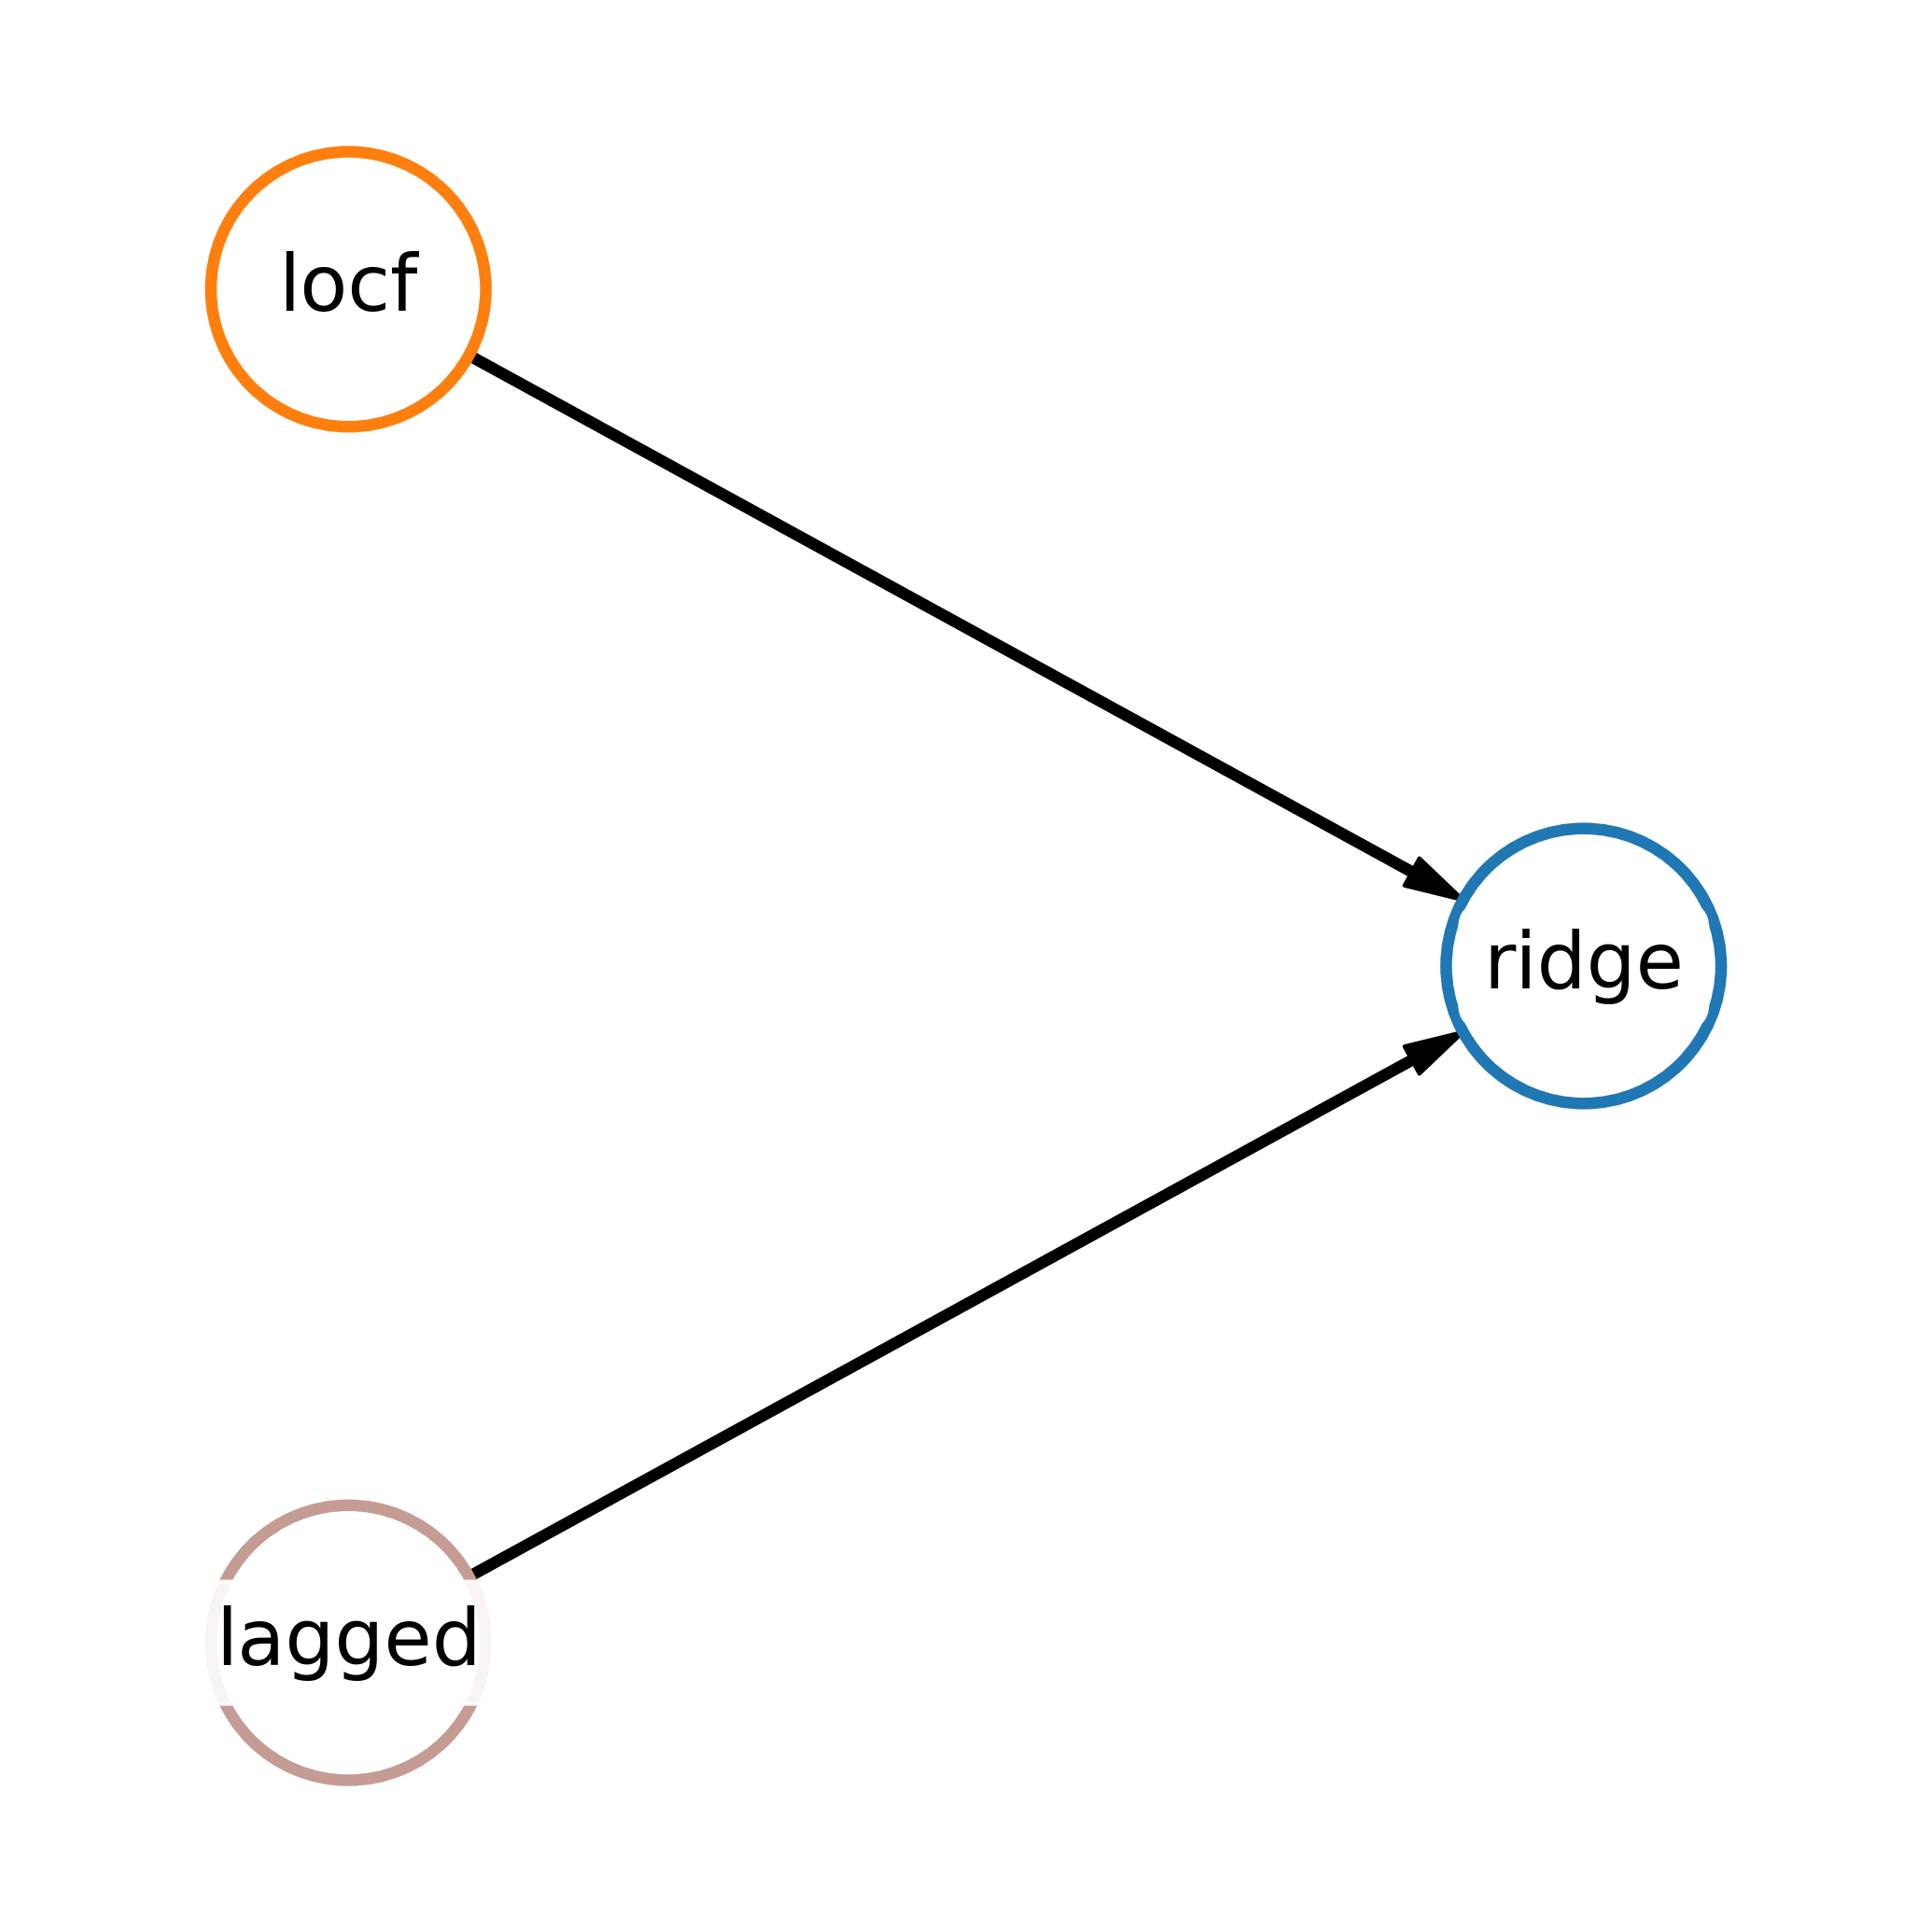

In [4]:
pipeline = model.fit(train_data)
forecast = model.forecast(test_data)
pipeline.show()

DEBUG:matplotlib.axes._base:update_title_pos


2022-11-22 14:22:00,687 - update_title_pos


DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.


2022-11-22 14:22:00,705 - findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.


DEBUG:matplotlib.axes._base:update_title_pos


2022-11-22 14:22:00,772 - update_title_pos


DEBUG:matplotlib.axes._base:update_title_pos


2022-11-22 14:22:00,852 - update_title_pos


DEBUG:matplotlib.axes._base:update_title_pos


2022-11-22 14:22:01,008 - update_title_pos


DEBUG:matplotlib.axes._base:update_title_pos


2022-11-22 14:22:01,055 - update_title_pos


DEBUG:matplotlib.axes._base:update_title_pos


2022-11-22 14:22:01,093 - update_title_pos


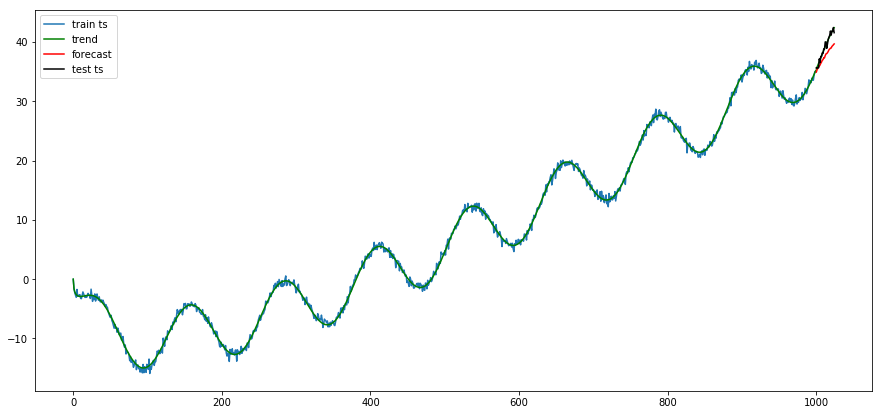

DEBUG:matplotlib.axes._base:update_title_pos


2022-11-22 14:22:01,241 - update_title_pos


DEBUG:matplotlib.axes._base:update_title_pos


2022-11-22 14:22:01,395 - update_title_pos


DEBUG:matplotlib.axes._base:update_title_pos


2022-11-22 14:22:01,433 - update_title_pos


DEBUG:matplotlib.axes._base:update_title_pos


2022-11-22 14:22:01,459 - update_title_pos


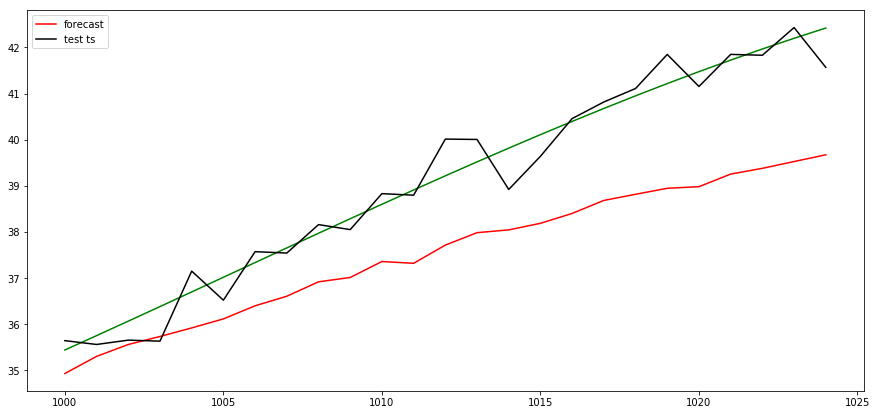

In [5]:
fig,ax  = plt.subplots()
fig.set(figwidth = 15,figheight = 7)
test_range = range(len(ts), len(ts)+len(ts_test))
test_range = range(end,end+horizon)
train_range = range(start,end)
total_range = range(start,end+horizon)

ax.plot(train_range,ts, label = 'train ts')
if trend is not None:
    ax.plot(train_range, trend,color = 'green',label = 'trend')
if trend_test is not None:
    ax.plot(test_range, trend_test,color = 'green')
ax.plot(test_range,forecast, color = 'red', label = 'forecast')
ax.plot(test_range, ts_test,color = 'black', label = 'test ts')
plt.legend();

fig1,ax1 = plt.subplots()
fig1.set(figwidth = 15,figheight = 7)

if trend_test is not None:
    ax1.plot(test_range, trend_test,color = 'green')
ax1.plot(test_range,forecast, color = 'red', label = 'forecast')
ax1.plot(test_range, ts_test,color = 'black', label = 'test ts')
plt.legend();

In [6]:
import sys
from sklearn.metrics import mean_squared_error as mse
from fedot.core.composer.metrics import QualityMetric
from fedot.core.data.data import InputData, OutputData
from fedot.core.repository.tasks import TsForecastingParams

def quantile_loss(y_true, y_pred, quantile=0.5):
    res = np.array(y_true)-np.array(y_pred)
    metrics=np.empty(shape = [0])
    for x in res:
        if x>=0:
            metrics = np.append(metrics, quantile*x)
        else:
            metrics = np.append(metrics,(quantile-1)*x)
    return np.mean(metrics)

class Quantile_Loss_1(QualityMetric):
    default_value = sys.maxsize

    @staticmethod
    def metric(reference: InputData, predicted: OutputData) -> float:
        value = quantile_loss(reference.target, predicted.predict,quantile = 0.1)
        return value


class Quantile_Loss_9(QualityMetric):
    default_value = sys.maxsize

    @staticmethod
    def metric(reference: InputData, predicted: OutputData) -> float:
        value = quantile_loss(reference.target, predicted.predict,quantile = 0.9)
        return value

In [7]:
#importing for tuning
from fedot.core.optimisers.adapters import PipelineAdapter
from fedot.core.pipelines.tuning.tuner_builder import TunerBuilder
from fedot.core.repository.quality_metrics_repository import RegressionMetricsEnum
from fedot.core.pipelines.tuning.tuner_interface import HyperoptTuner
from fedot.core.pipelines.tuning.unified import PipelineTuner
from fedot.core.optimisers.composer_requirements import ComposerRequirements
import datetime

from fedot.core.repository.quality_metrics_repository import RegressionMetricsEnum

#these parameters are the same for both tuners below
task = Task(TaskTypesEnum.ts_forecasting,TsForecastingParams(forecast_length=horizon))
composer_requirements = ComposerRequirements()
composer_requirements.validation_blocks = 2
composer_requirements.n_jobs= -1
composer_requirements.show_progress = True

#this tuner will be used to create lower confidence interval
low_tuner = TunerBuilder(task = task) \
         .with_tuner(PipelineTuner) \
         .with_metric(Quantile_Loss_1.get_value) \
         .with_iterations(10) \
         .with_timeout(datetime.timedelta(minutes=2)) \
         .with_requirements(composer_requirements) \
         .build(train_data)

#this tuner will be used to create uppper confidence interval
up_tuner = TunerBuilder(task = task) \
         .with_tuner(PipelineTuner) \
         .with_metric(Quantile_Loss_9.get_value) \
         .with_iterations(10) \
         .with_timeout(datetime.timedelta(minutes=2)) \
         .with_requirements(composer_requirements) \
         .build(train_data)

INFO:root:DataSourceSplitter - Hold out validation is applied.


2022-11-22 14:22:45,006 - DataSourceSplitter - Hold out validation is applied.


INFO:root:DataSourceSplitter - Hold out validation is applied.


2022-11-22 14:22:45,013 - DataSourceSplitter - Hold out validation is applied.


In [8]:
def quantile_maker(quantile,arrays):
    number_arrays = len(arrays)
    l = len(arrays[0])
    up = []
    low = []
    for i in range(l):
        x = np.array([arrays[j][i] for j in range(number_arrays)])
        q_up = np.quantile(x, 1-quantile)
        up.append(q_up)
        q_low = np.quantile(x,quantile)
        low.append(q_low)
    up = np.array(up)
    low = np.array(low)
    return {'up':up,'low':low}

def mean_maker(arrays):
    number_arrays = len(arrays)
    l = len(arrays[0])
    average = []
    for i in range(l):
        x = np.array([arrays[j][i] for j in range(number_arrays)])
        average.append(x.mean())
    return average

def median_maker(arrays):
    number_arrays = len(arrays)
    l = len(arrays[0])
    median = []
    for i in range(l):
        x = np.array([arrays[j][i] for j in range(number_arrays)])
        median.append(np.median(x))
    return median

def absolute_maker(arrays):
    number_arrays = len(arrays)
    l = len(arrays[0])
    maximum = []
    minimum = []
    for i in range(l):
        x = np.array([arrays[j][i] for j in range(number_arrays)])
        maximum.append(np.max(x))
        minimum.append(np.min(x))
    return {'up':np.array(maximum),'low':np.array(minimum)}

from scipy.stats import trim_mean
def truncated_mean_maker(arrays, quantile=0.1):
    number_arrays = len(arrays)
    l = len(arrays[0])
    trunc_mean = []
    for i in range(l):
        x = np.array([arrays[j][i] for j in range(number_arrays)])
        trunc_mean.append(trim_mean(x, quantile))
    return np.array(trunc_mean)

In [13]:
def conf_int_maker(model = model,
                   train_ts = ts,
                   number_models = 10, 
                   pipelines_show= False):
    """
    model - a fedot model of interest
    train_ts - the ts used for training the model
    ts_test - the testing series; used for plotting and visualization of the results
    number_models - number of models used to create the confidence intervals
    regim - type of getting lower and upper confidence intervals from the upper and lower arrays; 
            default is 'quantile' also avaliable 'average' and 'median', 'absolute_bounds', 'truncated_mean'
    plot - boolean parameter indicating wheter to show plot of the forecast and confidence intervals
    plot_history - boolean parameter indicating whether to show previous series
    """
    
    horizon = model.params.task.task_params.forecast_length
    train_data = model.train_data
    test_data = model.test_data
    forecast = model.predict(test_data)

    #4 lines below allow us take the best models
    fits = []
    for ind in model.history.individuals[-1]:
        fits.append(ind.fitness.value)
    fits = np.sort(np.array(fits))

    #create up and low predictions
    up_predictions = []
    low_predictions = []
    
    s=1
    for ind in model.history.individuals[-1]:
        if ind.fitness.value<=fits[number_models]:
            pipeline = PipelineAdapter().restore(ind.graph)
            print(f'Fitting pipeline №{s}')
            s+=1
            if pipelines_show:
                pipeline.show()
            
            
            #tuning upper confidence interval
            tuned_pipeline = up_tuner.tune(pipeline)
            tuned_pipeline.fit(train_data)
            preds = tuned_pipeline.predict(test_data).predict.ravel()
            up_predictions.append(preds)
            del tuned_pipeline
            
            #tuning lower confidence interval
            tuned_pipeline = low_tuner.tune(pipeline)
            tuned_pipeline.fit(train_data)
            preds = tuned_pipeline.predict(test_data).predict.ravel()
            low_predictions.append(preds)
            del tuned_pipeline
    return {'up_predictions':up_predictions, 'low_predictions':low_predictions}

In [10]:
def conf_int_plotting(up_predictions,
                      low_predictions,
                      horizon=horizon,
                      forecast=forecast,
                      ts=ts,
                      ts_test=ts_test,
                      trend_test=trend_test,
                      regim = 'quantile',
                      plot_history = True,
                      plot_up_int = True,
                      plot_low_int = True,
                      plot_trend = True,
                      plot_forecast = True,
                      plot_upper_train = True,
                      plot_lower_train = True,
                      plot_ts_test = True):
    if regim == 'quantile':
        up_res= quantile_maker(quantile = 0.1, arrays = up_predictions)['up']
        low_res= quantile_maker(quantile = 0.1, arrays = low_predictions)['low']
    if regim == 'mean':
        up_res = mean_maker(arrays = up_predictions)
        low_res = mean_maker(arrays = low_predictions)
    if regim == 'median':
        up_res = median_maker(arrays = up_predictions)
        low_res = median_maker(arrays = low_predictions)
    if regim == 'absolute_bounds':
        up_res = absolute_maker(arrays = up_predictions)['up']
        low_res = absolute_maker(arrays = low_predictions)['low']
    if regim == 'truncated_mean':
        up_res = truncated_mean_maker(arrays = up_predictions)
        low_res = truncated_mean_maker(arrays = low_predictions)
    
    up = np.maximum(up_res,forecast)  
    low = np.minimum(low_res,forecast)

    r = range(1,horizon+1)
    fig,ax = plt.subplots()
    fig.set(figwidth = 15,figheight = 7)
    for i in range(len(up_predictions)):
        if i==0:
            if plot_upper_train:
                ax.plot(r,up_predictions[i], color = 'yellow',label = 'preds for up train')
            if plot_lower_train:
                ax.plot(r,low_predictions[i], color = 'pink',label = 'preds for low train')
        else:
            if plot_upper_train:
                ax.plot(r,up_predictions[i], color = 'yellow')
            if plot_lower_train:
                ax.plot(r,low_predictions[i], color = 'pink')    
    if plot_up_int:
        ax.plot(r,up, color = 'blue', label  = 'Up',marker= '.')
    if plot_low_int:
        ax.plot(r,low, color = 'green', label  = 'Low',marker = '.')
    if plot_forecast:
        ax.plot(r,forecast, color = 'red', label = 'Forecast')
    if ts_test is not None:
        if plot_ts_test:
            ax.plot(r,ts_test,color = 'black', label = 'Actual TS')
    if trend_test is not None:
        if plot_trend:
            ax.plot(r, trend_test, color = 'magenta', label = 'True Trend')
    plt.legend()
    if plot_history:
        fig1,ax1 = plt.subplots()
        
        fig1.set(figwidth = 15,figheight = 7)
       
        train_range = range(len(ts))
        test_range = range(len(ts),len(ts)+horizon)
        
        ax1.plot(train_range,ts, color = 'gray',label = 'Train ts')
        ax1.plot(test_range, up,color = 'blue', label = 'Up')
        ax1.plot(test_range, low,color = 'green', label = 'Low')
        ax1.plot(test_range,forecast, color = 'red', label = 'Forecast')
        if ts_test is not None:
            ax1.plot(test_range, ts_test,color = 'black', label = 'Actual TS')  
        if trend_test is not None:
            ax1.plot(test_range, trend_test, color = 'magenta', label = 'True Trend')
        plt.legend();

In [15]:
x = conf_int_maker(model = model, number_models = 1,pipelines_show = False)

INFO:root:PipelineTuner - Hyperparameters optimization start


Fitting pipeline №1
2022-11-22 14:30:33,117 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002429 seconds


2022-11-22 14:30:33,351 - build_posterior_wrapper took 0.002429 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 14:30:33,364 - TPE using 0 trials
 10%|█         | 1/10 [00:00<00:02,  3.48trial/s, best loss: 0.0969850259908243]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002888 seconds


2022-11-22 14:30:33,640 - build_posterior_wrapper took 0.002888 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.096985


2022-11-22 14:30:33,651 - TPE using 1/1 trials with best loss 0.096985
 20%|██        | 2/10 [00:01<00:07,  1.10trial/s, best loss: 0.0969850259908243]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002763 seconds


2022-11-22 14:30:34,993 - build_posterior_wrapper took 0.002763 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.096985


2022-11-22 14:30:35,002 - TPE using 2/2 trials with best loss 0.096985
 30%|███       | 3/10 [00:02<00:07,  1.07s/trial, best loss: 0.0969850259908243]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005903 seconds


2022-11-22 14:30:36,251 - build_posterior_wrapper took 0.005903 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.096985


2022-11-22 14:30:36,255 - TPE using 3/3 trials with best loss 0.096985
 40%|████      | 4/10 [00:04<00:08,  1.45s/trial, best loss: 0.0969850259908243]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005071 seconds


2022-11-22 14:30:38,279 - build_posterior_wrapper took 0.005071 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.096985


2022-11-22 14:30:38,291 - TPE using 4/4 trials with best loss 0.096985
 50%|█████     | 5/10 [00:06<00:06,  1.32s/trial, best loss: 0.0969850259908243]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003222 seconds


2022-11-22 14:30:39,372 - build_posterior_wrapper took 0.003222 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.096985


2022-11-22 14:30:39,380 - TPE using 5/5 trials with best loss 0.096985
 60%|██████    | 6/10 [00:06<00:03,  1.04trial/s, best loss: 0.0969850259908243]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002509 seconds


2022-11-22 14:30:39,635 - build_posterior_wrapper took 0.002509 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.096985


2022-11-22 14:30:39,641 - TPE using 6/6 trials with best loss 0.096985
 70%|███████   | 7/10 [00:06<00:02,  1.20trial/s, best loss: 0.0969850259908243]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002569 seconds


2022-11-22 14:30:40,196 - build_posterior_wrapper took 0.002569 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.096985


2022-11-22 14:30:40,202 - TPE using 7/7 trials with best loss 0.096985
 80%|████████  | 8/10 [00:07<00:01,  1.18trial/s, best loss: 0.0969850259908243]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002563 seconds


2022-11-22 14:30:41,089 - build_posterior_wrapper took 0.002563 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.096985


2022-11-22 14:30:41,095 - TPE using 8/8 trials with best loss 0.096985
 90%|█████████ | 9/10 [00:09<00:01,  1.06s/trial, best loss: 0.0969850259908243]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004006 seconds


2022-11-22 14:30:42,616 - build_posterior_wrapper took 0.004006 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.096985


2022-11-22 14:30:42,622 - TPE using 9/9 trials with best loss 0.096985
100%|██████████| 10/10 [00:09<00:00,  1.00trial/s, best loss: 0.0969850259908243]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 14:30:43,576 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.097 equal or better than initial (+ 5% deviation) 0.156


2022-11-22 14:30:43,592 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.097 equal or better than initial (+ 5% deviation) 0.156


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 14:30:43,862 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002314 seconds


2022-11-22 14:30:44,149 - build_posterior_wrapper took 0.002314 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 14:30:44,156 - TPE using 0 trials
 10%|█         | 1/10 [00:00<00:06,  1.39trial/s, best loss: 0.31473831776074496]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003308 seconds


2022-11-22 14:30:44,873 - build_posterior_wrapper took 0.003308 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.314738


2022-11-22 14:30:44,885 - TPE using 1/1 trials with best loss 0.314738
 20%|██        | 2/10 [00:02<00:09,  1.20s/trial, best loss: 0.31473831776074496]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003348 seconds


2022-11-22 14:30:46,403 - build_posterior_wrapper took 0.003348 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.314738


2022-11-22 14:30:46,409 - TPE using 2/2 trials with best loss 0.314738
 30%|███       | 3/10 [00:03<00:07,  1.08s/trial, best loss: 0.31473831776074496]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002550 seconds


2022-11-22 14:30:47,353 - build_posterior_wrapper took 0.002550 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.314738


2022-11-22 14:30:47,359 - TPE using 3/3 trials with best loss 0.314738
 40%|████      | 4/10 [00:04<00:06,  1.05s/trial, best loss: 0.31473831776074496]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002663 seconds


2022-11-22 14:30:48,349 - build_posterior_wrapper took 0.002663 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.314738


2022-11-22 14:30:48,355 - TPE using 4/4 trials with best loss 0.314738
 50%|█████     | 5/10 [00:05<00:05,  1.15s/trial, best loss: 0.31473831776074496]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006062 seconds


2022-11-22 14:30:49,683 - build_posterior_wrapper took 0.006062 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.314738


2022-11-22 14:30:49,690 - TPE using 5/5 trials with best loss 0.314738
 60%|██████    | 6/10 [00:06<00:04,  1.04s/trial, best loss: 0.31473831776074496]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005255 seconds


2022-11-22 14:30:50,502 - build_posterior_wrapper took 0.005255 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.314738


2022-11-22 14:30:50,508 - TPE using 6/6 trials with best loss 0.314738
 70%|███████   | 7/10 [00:07<00:03,  1.05s/trial, best loss: 0.31473831776074496]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004816 seconds


2022-11-22 14:30:51,582 - build_posterior_wrapper took 0.004816 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.314738


2022-11-22 14:30:51,589 - TPE using 7/7 trials with best loss 0.314738
 80%|████████  | 8/10 [00:08<00:02,  1.11s/trial, best loss: 0.31473831776074496]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003560 seconds


2022-11-22 14:30:52,829 - build_posterior_wrapper took 0.003560 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.314738


2022-11-22 14:30:52,836 - TPE using 8/8 trials with best loss 0.314738
 90%|█████████ | 9/10 [00:09<00:00,  1.10trial/s, best loss: 0.31473831776074496]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002904 seconds


2022-11-22 14:30:53,292 - build_posterior_wrapper took 0.002904 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.314738


2022-11-22 14:30:53,299 - TPE using 9/9 trials with best loss 0.314738
100%|██████████| 10/10 [00:10<00:00,  1.04s/trial, best loss: 0.31473831776074496]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 14:30:55,203 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.315 equal or better than initial (+ 5% deviation) 0.736


2022-11-22 14:30:55,209 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.315 equal or better than initial (+ 5% deviation) 0.736


INFO:root:PipelineTuner - Hyperparameters optimization start


Fitting pipeline №2
2022-11-22 14:30:55,883 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003113 seconds


2022-11-22 14:30:56,149 - build_posterior_wrapper took 0.003113 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 14:30:56,155 - TPE using 0 trials
 10%|█         | 1/10 [00:00<00:04,  1.80trial/s, best loss: 0.20878090329134213]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003312 seconds


2022-11-22 14:30:56,707 - build_posterior_wrapper took 0.003312 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.208781


2022-11-22 14:30:56,714 - TPE using 1/1 trials with best loss 0.208781
 20%|██        | 2/10 [00:01<00:05,  1.53trial/s, best loss: 0.20878090329134213]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003510 seconds


2022-11-22 14:30:57,430 - build_posterior_wrapper took 0.003510 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.208781


2022-11-22 14:30:57,437 - TPE using 2/2 trials with best loss 0.208781
 30%|███       | 3/10 [00:02<00:07,  1.07s/trial, best loss: 0.20878090329134213]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006633 seconds


2022-11-22 14:30:58,991 - build_posterior_wrapper took 0.006633 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.208781


2022-11-22 14:30:58,998 - TPE using 3/3 trials with best loss 0.208781
 40%|████      | 4/10 [00:03<00:05,  1.16trial/s, best loss: 0.19760912644317322]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002879 seconds


2022-11-22 14:30:59,534 - build_posterior_wrapper took 0.002879 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.197609


2022-11-22 14:30:59,540 - TPE using 4/4 trials with best loss 0.197609
 50%|█████     | 5/10 [00:03<00:03,  1.54trial/s, best loss: 0.14811149192437026]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003068 seconds


2022-11-22 14:30:59,803 - build_posterior_wrapper took 0.003068 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.148111


2022-11-22 14:30:59,810 - TPE using 5/5 trials with best loss 0.148111
 60%|██████    | 6/10 [00:04<00:03,  1.17trial/s, best loss: 0.14811149192437026]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002996 seconds


2022-11-22 14:31:01,062 - build_posterior_wrapper took 0.002996 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.148111


2022-11-22 14:31:01,069 - TPE using 6/6 trials with best loss 0.148111
 70%|███████   | 7/10 [00:05<00:02,  1.12trial/s, best loss: 0.14811149192437026]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002558 seconds


2022-11-22 14:31:02,032 - build_posterior_wrapper took 0.002558 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.148111


2022-11-22 14:31:02,038 - TPE using 7/7 trials with best loss 0.148111
 80%|████████  | 8/10 [00:06<00:01,  1.10trial/s, best loss: 0.14811149192437026]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002631 seconds


2022-11-22 14:31:02,965 - build_posterior_wrapper took 0.002631 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.148111


2022-11-22 14:31:02,972 - TPE using 8/8 trials with best loss 0.148111
 90%|█████████ | 9/10 [00:07<00:00,  1.41trial/s, best loss: 0.14799989742534184]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002465 seconds


2022-11-22 14:31:03,248 - build_posterior_wrapper took 0.002465 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.148000


2022-11-22 14:31:03,254 - TPE using 9/9 trials with best loss 0.148000
100%|██████████| 10/10 [00:07<00:00,  1.35trial/s, best loss: 0.09866972244204375]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 14:31:03,815 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.099 equal or better than initial (+ 5% deviation) 0.156


2022-11-22 14:31:03,821 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.099 equal or better than initial (+ 5% deviation) 0.156


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 14:31:04,121 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002486 seconds


2022-11-22 14:31:04,447 - build_posterior_wrapper took 0.002486 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 14:31:04,453 - TPE using 0 trials
 10%|█         | 1/10 [00:01<00:14,  1.61s/trial, best loss: 0.30004802291270155]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003023 seconds


2022-11-22 14:31:06,061 - build_posterior_wrapper took 0.003023 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.300048


2022-11-22 14:31:06,071 - TPE using 1/1 trials with best loss 0.300048
 20%|██        | 2/10 [00:02<00:11,  1.45s/trial, best loss: 0.30004802291270155]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002659 seconds


2022-11-22 14:31:07,393 - build_posterior_wrapper took 0.002659 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.300048


2022-11-22 14:31:07,399 - TPE using 2/2 trials with best loss 0.300048
 30%|███       | 3/10 [00:04<00:08,  1.27s/trial, best loss: 0.30004802291270155]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005948 seconds


2022-11-22 14:31:08,459 - build_posterior_wrapper took 0.005948 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.300048


2022-11-22 14:31:08,466 - TPE using 3/3 trials with best loss 0.300048
 40%|████      | 4/10 [00:04<00:05,  1.03trial/s, best loss: 0.30004802291270155]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002565 seconds


2022-11-22 14:31:08,971 - build_posterior_wrapper took 0.002565 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.300048


2022-11-22 14:31:08,977 - TPE using 4/4 trials with best loss 0.300048
 50%|█████     | 5/10 [00:05<00:05,  1.13s/trial, best loss: 0.30004802291270155]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003029 seconds


2022-11-22 14:31:10,372 - build_posterior_wrapper took 0.003029 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.300048


2022-11-22 14:31:10,379 - TPE using 5/5 trials with best loss 0.300048
 60%|██████    | 6/10 [00:06<00:03,  1.09trial/s, best loss: 0.30004802291270155]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002876 seconds


2022-11-22 14:31:10,891 - build_posterior_wrapper took 0.002876 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.300048


2022-11-22 14:31:10,897 - TPE using 6/6 trials with best loss 0.300048
 70%|███████   | 7/10 [00:07<00:02,  1.14trial/s, best loss: 0.30004802291270155]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007904 seconds


2022-11-22 14:31:11,684 - build_posterior_wrapper took 0.007904 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.300048


2022-11-22 14:31:11,697 - TPE using 7/7 trials with best loss 0.300048
 80%|████████  | 8/10 [00:08<00:02,  1.04s/trial, best loss: 0.30004802291270155]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002549 seconds


2022-11-22 14:31:13,068 - build_posterior_wrapper took 0.002549 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.300048


2022-11-22 14:31:13,078 - TPE using 8/8 trials with best loss 0.300048
 90%|█████████ | 9/10 [00:09<00:00,  1.19trial/s, best loss: 0.27919818071101693]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002625 seconds


2022-11-22 14:31:13,481 - build_posterior_wrapper took 0.002625 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.279198


2022-11-22 14:31:13,492 - TPE using 9/9 trials with best loss 0.279198
100%|██████████| 10/10 [00:09<00:00,  1.05trial/s, best loss: 0.27919818071101693]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 14:31:14,330 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.279 equal or better than initial (+ 5% deviation) 0.753


2022-11-22 14:31:14,338 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.279 equal or better than initial (+ 5% deviation) 0.753


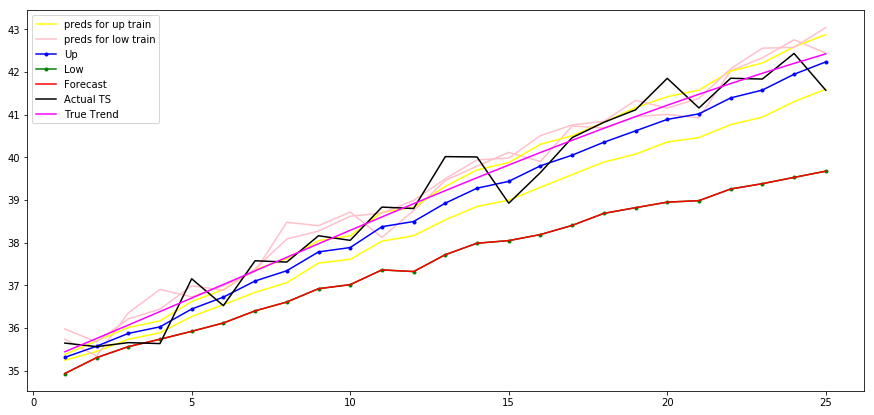

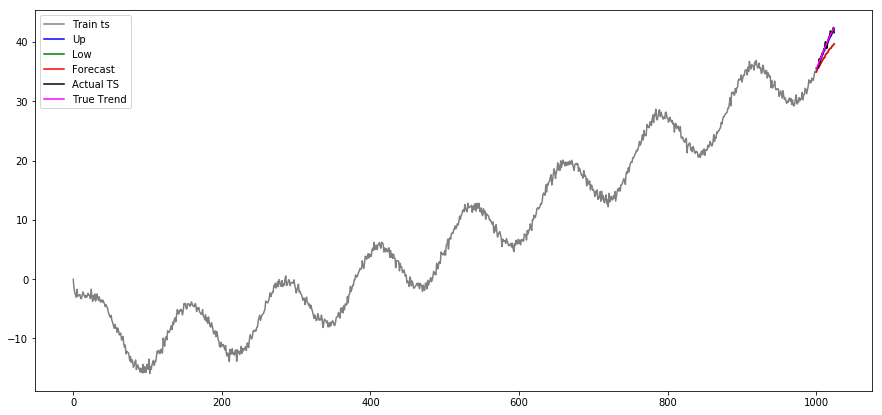

In [16]:
conf_int_plotting(up_predictions = x['up_predictions'],
                  low_predictions = x['low_predictions'],
                  regim='median',
                  plot_history = True,
                  plot_up_int = True,
                  plot_low_int = True,
                  plot_trend = True,
                  plot_forecast = True,
                  plot_upper_train = True,
                  plot_lower_train = True,
                  plot_ts_test = True)